**What is the SparkContext:** Main entry point for Spark functionality. A SparkContext represents the connection to a Spark cluster, and can be used to create RDDs, accumulators and broadcast variables on that cluster. Only one SparkContext may be active per JVM. You must stop() the active SparkContext before creating a new one.

In [2]:
from pyspark import SparkContext, SparkConf

In [4]:
help(SparkContext)

Help on class SparkContext in module pyspark.context:

class SparkContext(builtins.object)
 |  SparkContext(master: Optional[str] = None, appName: Optional[str] = None, sparkHome: Optional[str] = None, pyFiles: Optional[List[str]] = None, environment: Optional[Dict[str, Any]] = None, batchSize: int = 0, serializer: 'Serializer' = CloudPickleSerializer(), conf: Optional[pyspark.conf.SparkConf] = None, gateway: Optional[py4j.java_gateway.JavaGateway] = None, jsc: Optional[py4j.java_gateway.JavaObject] = None, profiler_cls: Type[pyspark.profiler.BasicProfiler] = <class 'pyspark.profiler.BasicProfiler'>, udf_profiler_cls: Type[pyspark.profiler.UDFBasicProfiler] = <class 'pyspark.profiler.UDFBasicProfiler'>, memory_profiler_cls: Type[pyspark.profiler.MemoryProfiler] = <class 'pyspark.profiler.MemoryProfiler'>)
 |  
 |  Main entry point for Spark functionality. A SparkContext represents the
 |  connection to a Spark cluster, and can be used to create :class:`RDD` and
 |  broadcast variables 

### First way to create SparkContext

In [ ]:
if sc:
    sc.stop()
    
conf = SparkConf().setAppName("PySpark_Example").setMaster("local[4]")
sc = SparkContext(conf=conf)

1. setAppName("PySpark_Example")
Ini buat kasih nama ke aplikasi Spark yang lagi dibuat.
Nama ini nanti nongol di web UI-nya Spark, jadi kalau lagi ngejalanin banyak aplikasi sekaligus, gampang bedain yang mana.
Di sini namanya dikasih "PySpark_Example", tapi bisa bebas kasih nama apa aja.
2. setMaster("local[4]")
Ini buat ngatur di mana aplikasi Spark dijalankan sama berapa core/CPU yang dipakai.
"local[4]" artinya jalanin di mode lokal (di komputer sendiri, nggak pakai cluster), dan pakai 4 core/thread buat eksekusi.
Kalau "local[*]", artinya pakai semua core yang ada di mesin.
Kalau cuma "local[1]", ya cuma pakai 1 core aja.

**Parameter Tambahan Lainnya (kalau perlu)**

- spark.executor.memory

Contoh: conf.set("spark.executor.memory", "2g")
Buat ngatur berapa banyak RAM yang dipakai setiap executor (2 GB di contoh ini).

- spark.driver.memory

Contoh: conf.set("spark.driver.memory", "4g")
Buat ngatur RAM yang dipakai driver aplikasi (di sini 4 GB).

- spark.executor.cores

Contoh: conf.set("spark.executor.cores", "2")
Ini buat ngatur berapa core per executor di cluster (nggak relevan kalau mode lokal).

- spark.default.parallelism

Contoh: conf.set("spark.default.parallelism", "8")
Ngatur jumlah partisi default buat operasi kayak reduceByKey atau join.

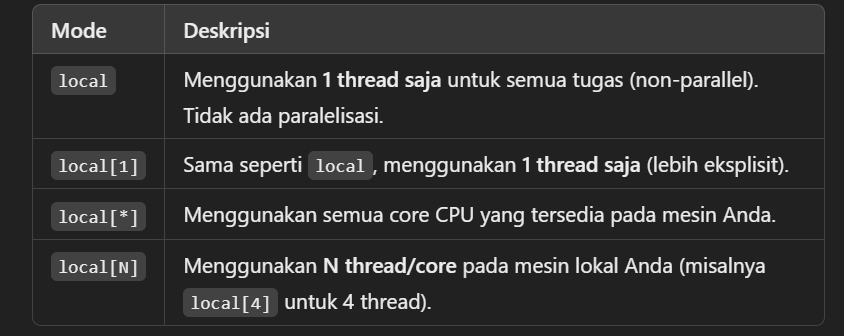

In [11]:
sc.getConf().getAll()

[('spark.driver.extraJavaOptions',
  '-Djava.net.preferIPv6Addresses=false -XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/jdk.internal.ref=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.security.krb5=ALL-UNNAMED -Djdk.reflect.useDirectMethodHandle=false'),
 ('spark.master', 'local[4]'),
 ('spark.app.name', 'PySpark_Example'),
 ('spark.executor.id', 'driver')

In [12]:
sc.stop()

### Second way, Create a SparkContext that loads settings